In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
FILENAME = './data/Fall_2015.csv'

In [2]:
# Read, clean, and add Enrollment column to data
df = pd.read_csv(FILENAME).dropna()
drops = ['CRN', 'Term', 'Sched Type', 'Course Section', 'Primary Instructor', 'W']
df = df.drop(drops, 1)
df.ix[:, 'A+':'F'] = df.ix[:, 'A+':'F'].astype(np.int)
df.insert(df.columns.get_loc('Average Grade'), 'Enrollment', df.ix[:, 'A+':'F'].sum(axis=1))

In [3]:
by_course = df.set_index(['Course Subject', 'Course Number'])
by_course.head(10)

Course Title  Enrollment  \
Course Subject Course Number                                               
AAS            100              Intro Asian American Studies          25   
               100              Intro Asian American Studies          28   
               215              US Citizenship Comparatively          29   
ABE            100            Intro Agric & Biological Engrg          40   
               199               Water in the Global Environ          21   
               223              ABE Principles: Machine Syst          63   
               224              ABE Principles: Soil & Water          59   
               430                        Project Management         132   
               466             Engineering Off-Road Vehicles          31   
               488            Bioprocessing Biomass for Fuel          29   

                              Average Grade  A+    A  A-  B+   B  B-  C+  C  \
Course Subject Course Number                                                  
AAS            100                     3.72   0   19   1   2   1   1   0  0   
               100                     3.47   1   13   5   1   3   3   1  0   
               215                     2.81   1    3   5   4   1   6   1  3   
ABE            100                     3.63   0   27   0   0  11   0   0  2   
               199                     3.97   2   18   0   1   0   0   0  0   
               223                     3.50   1   29   9  10   7   0   4  1   
               224                     3.66  19   30   0   4   0   0   1  2   
               430                     3.93   0  119   9   2   1   0   0  0   
               466                     3.49   2   11  11   2   0   2   0  1   
               488                     3.63   6    9   5   4   3   0   2  0   

                              C-  D+  D  D-  F  
Course Subject Course Number                    
AAS            100             0   0  1   0  0  
               100             0   0  0   0  1  
               215             2   1  1   1  0  
ABE            100             0   0  0   0  0  
               199             0   0  0   0  0  
               223             0   1  0   1  0  
               224             0   0  0   0  3  
               430             0   0  0   0  1  
               466             1   0  0   0  1  
               488             0   0  0   0  0

In [4]:
# Creates a nice plot of course distribution
def plot_course_num(course, name, number):
    grades = course.loc[:, 'A+':'F']
    weighted_avg = np.round(np.ma.average(
            course['Average Grade'], weights=course['Enrollment']), 2)
    highest = np.max(grades.values)
    grades.T.plot(kind='bar', ylim=(0, int(highest*1.1)+1), legend=False,
                title='{0} {1} Grades'.format(name, number))
    plt.text(7.75, highest*0.95, 'Average GPA: {0:.2f}'.format(weighted_avg), fontsize=12)

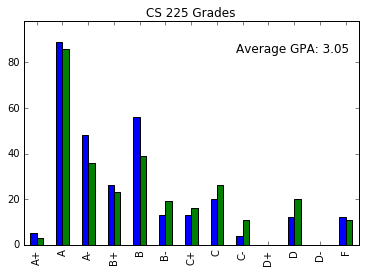

In [5]:
course, number = 'CS', 225
plot_course_num(by_course.loc[course].loc[[number]], course, number)

In [6]:
# Calculate GPA per course by combining courses and running a weighted average by Enrollment
enroll = pd.concat((by_course['Enrollment'], by_course['Average Grade']), axis=1)
groups = enroll.groupby(level=[0,1])
avgs = groups.apply(lambda d: np.round_(np.ma.average(d['Average Grade'], weights=d['Enrollment']), 2)
                   ).to_frame('Course GPA')
avgs.insert(0, 'Enrollment', groups.apply(np.sum)['Enrollment'].astype(np.int))

In [7]:
avgs.ix[['GE', 'IE']]

Enrollment  Course GPA
Course Subject Course Number                        
GE             100                    82        3.94
               261                    94        3.27
               310                    57        3.15
               320                    52        2.65
               361                    27        3.68
               400                    67        3.72
               402                    23        3.64
               410                    45        3.09
               422                    40        3.25
               450                    70        3.55
               495                    64        3.92
IE             300                   207        2.65
               310                    85        3.04
               340                    26        3.24
               360                    40        3.39
               400                    23        3.33
               410                    85        2.81
               411                    40        3.48
               412                    30        3.01
               430                    81        3.29
               522                    59        3.47
               523                    59        3.59
               524                    64        3.55

In [8]:
# Another weighted average but now grouping by major
group = avgs.groupby(level=0)
all_avg = group.apply(lambda d: np.round_(np.ma.average(d['Course GPA'], weights=d['Enrollment']), 2)
                     ).to_frame('Major GPA')
all_avg.ix[40:45]

,Major GPA
Course Subject,
CWL,3.76
DANC,3.71
EALC,3.51
ECE,3.12
ECON,3.17


In [9]:
engineering = ['ABE', 'AE', 'BIOE', 'CEE', 'CHBE', 'CS','ECE',
               'GE', 'IE', 'ME', 'MSE', 'NPRE', 'PHYS', 'TAM']
all_avg.loc[engineering].sort_values(by=['Major GPA'])

,Major GPA
Course Subject,
PHYS,2.87
TAM,2.96
CHBE,3.00
IE,3.11
ECE,3.12
MSE,3.27
CS,3.29
ME,3.38
AE,3.42
